<a href="https://colab.research.google.com/github/pradeepbiswal/pbs/blob/master/cnn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import statsmodels.api as sm
import pandas.util.testing as tm
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from keras.datasets import mnist
from keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

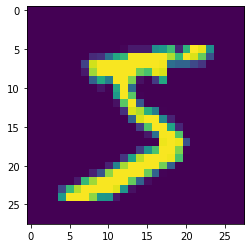

In [6]:
#plot the first image in the dataset
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [7]:
#check image shape
X_train[0].shape

(28, 28)

In [8]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
from keras.utils import to_categorical
#one-hot encode target column.We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Building the **MODEL** 

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 160s 85ms/step - loss: 0.6954 - accuracy: 0.9121 - val_loss: 0.0781 - val_accuracy: 0.9754
Epoch 2/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0827 - val_accuracy: 0.9763
Epoch 3/3
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0872 - val_accuracy: 0.9746


In [15]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[2.2474064e-10, 6.2869780e-14, 2.9431634e-11, 4.6274099e-08,
        1.5287873e-11, 9.4622639e-13, 3.5228613e-15, 9.9999988e-01,
        8.7256709e-11, 1.5063610e-07],
       [3.1602660e-05, 9.7117621e-09, 9.9996769e-01, 6.8833026e-07,
        1.3016312e-12, 8.6147635e-14, 2.2661768e-08, 5.3414894e-12,
        3.8674810e-09, 8.1774634e-14],
       [3.0244461e-08, 9.9815971e-01, 5.5601879e-04, 1.7363344e-10,
        7.9532084e-04, 5.9787567e-07, 1.3959731e-08, 1.2223632e-04,
        3.6598384e-04, 1.8750731e-07],
       [9.9999917e-01, 4.4949594e-13, 1.3380584e-10, 4.4635343e-14,
        6.3155266e-11, 1.5192824e-09, 1.7410554e-07, 6.8125849e-10,
        4.0135490e-12, 6.9372959e-07]], dtype=float32)

In [16]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)